In [2]:
#Importing Libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [3]:
#Reading the dataset

data=pd.read_csv(r"C:\Users\deeks\Desktop\CAPSTONE PROJECT\Kidnap.csv")
data

SL  Year           State/UT Region_Type  KD_Total_Cases  \
0     1  2016     Andhra Pradesh       State             917   
1     1  2016  Arunachal Pradesh       State             112   
2     1  2016              Assam       State            6126   
3     1  2016              Bihar       State            7324   
4     1  2016       Chhattisgarh       State            2071   
..   ..   ...                ...         ...             ...   
211   6  2021      Daman and Diu          UT            5527   
212   6  2021              Delhi          UT            1013   
213   6  2021  Jammu and Kashmir          UT               4   
214   6  2021        Lakshadweep          UT               0   
215   6  2021         Puducherry          UT              40   

     Mid_Year_Projection  Rate_of_kanda  Male_below_6  Female_below_6  \
0                  517.4            1.8            44              67   
1                   13.2            8.5             1               1   
2                  325.8           18.8             1               8   
3                 1043.0            7.0             1               7   
4                  259.9            8.0           153             252   
..                   ...            ...           ...             ...   
211                207.0           26.7            56              51   
212                134.4            7.5             1               0   
213                  3.0            1.3             0               0   
214                  0.7            0.0             0               0   
215                 15.8            2.5             2               1   

     Below_6  ...  Total_Adult_Victims  Male_Unrecovered  Female_Unrecovered  \
0         17  ...                  342               844                1186   
1          4  ...                    5                18                  23   
2         47  ...                 2444             10969               13413   
3         15  ...                 1909              3568                5477   
4        113  ...                  353               726                1079   
..       ...  ...                  ...               ...                 ...   
211      107  ...                  535              3423                6084   
212        1  ...                  548                30                 811   
213        0  ...                    4                 1                  10   
214        0  ...                    0                 0                   0   
215        3  ...                   13                63                  38   

     Total_Unrecovered  Male_Kidnapped_and_Abducted  \
0                  286                          639   
1                   32                           91   
2                  786                         5342   
3                 1734                         5595   
4                  624                         1527   
..                 ...                          ...   
211               9507                         1639   
212                841                           84   
213                 11                            3   
214                  0                            0   
215                101                           17   

     Female_Kidnapped_and_Abducted  Male_Recovered  Female_Recovered  \
0                              925              83               248   
1                              123              27                68   
2                             6128              60               189   
3                             7329             685              2261   
4                             2151             559              1042   
..                             ...             ...               ...   
211                           4249            1606              3743   
212                            957              73               978   
213                              1               3                 1   
214              

In [3]:
#Columns of the dataset

data.columns

Index(['SL', 'Year', 'State/UT', 'Region_Type', 'KD_Total_Cases',
       'Mid_Year_Projection', 'Rate_of_kanda', 'Male_below_6',
       'Female_below_6', 'Below_6', 'Male_6-12', 'Female_6-12', 'Between_6-12',
       'Male_12-16', 'Female_12-16', 'Between_12-16', 'Male_16-18',
       'Female_16-18', 'Between_16-18', 'Male_Child_Victims',
       'Female_Child_Victims', 'Total_Child_Victims', 'Male_18-30',
       'Female_18-30', 'Between_18-30', 'Male_30-60', 'Female_30-60',
       'Between_30-60', 'Male_above_60', 'Female_above_60', 'Above_60',
       'Male_Adult_Victims', 'Female_Adult_Victims', 'Total_Adult_Victims',
       'Male_Unrecovered', 'Female_Unrecovered', 'Total_Unrecovered',
       'Male_Kidnapped_and_Abducted', 'Female_Kidnapped_and_Abducted',
       'Male_Recovered', 'Female_Recovered', 'Total_Recovered', 'Factors'],
      dtype='object')

In [4]:
#Data Types of the dataset

data.dtypes

SL                                 int64
Year                               int64
State/UT                          object
Region_Type                       object
KD_Total_Cases                     int64
Mid_Year_Projection              float64
Rate_of_kanda                    float64
Male_below_6                       int64
Female_below_6                     int64
Below_6                            int64
Male_6-12                          int64
Female_6-12                        int64
Between_6-12                       int64
Male_12-16                         int64
Female_12-16                       int64
Between_12-16                      int64
Male_16-18                         int64
Female_16-18                       int64
Between_16-18                      int64
Male_Child_Victims                 int64
Female_Child_Victims               int64
Total_Child_Victims                int64
Male_18-30                         int64
Female_18-30                       int64
Between_18-30   

In [5]:
#No Null Values

data.isnull().sum()

SL                               0
Year                             0
State/UT                         0
Region_Type                      0
KD_Total_Cases                   0
Mid_Year_Projection              0
Rate_of_kanda                    0
Male_below_6                     0
Female_below_6                   0
Below_6                          0
Male_6-12                        0
Female_6-12                      0
Between_6-12                     0
Male_12-16                       0
Female_12-16                     0
Between_12-16                    0
Male_16-18                       0
Female_16-18                     0
Between_16-18                    0
Male_Child_Victims               0
Female_Child_Victims             0
Total_Child_Victims              0
Male_18-30                       0
Female_18-30                     0
Between_18-30                    0
Male_30-60                       0
Female_30-60                     0
Between_30-60                    0
Male_above_60       

In [6]:
#Information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SL                             216 non-null    int64  
 1   Year                           216 non-null    int64  
 2   State/UT                       216 non-null    object 
 3   Region_Type                    216 non-null    object 
 4   KD_Total_Cases                 216 non-null    int64  
 5   Mid_Year_Projection            216 non-null    float64
 6   Rate_of_kanda                  216 non-null    float64
 7   Male_below_6                   216 non-null    int64  
 8   Female_below_6                 216 non-null    int64  
 9   Below_6                        216 non-null    int64  
 10  Male_6-12                      216 non-null    int64  
 11  Female_6-12                    216 non-null    int64  
 12  Between_6-12                   216 non-null    int

In [7]:
#Statistical Analysis

data.describe()

SL         Year  KD_Total_Cases  Mid_Year_Projection  \
count  216.000000   216.000000      216.000000           216.000000   
mean     3.500000  2018.500000     2690.666667           367.784722   
std      1.711792     1.711792     3900.344994           471.540336   
min      1.000000  2016.000000        0.000000             0.700000   
25%      2.000000  2017.000000       89.000000            16.550000   
50%      3.500000  2018.500000      909.500000           240.450000   
75%      5.000000  2020.000000     3984.750000           552.800000   
max      6.000000  2021.000000    21711.000000          2317.000000   

       Rate_of_kanda  Male_below_6  Female_below_6     Below_6   Male_6-12  \
count     216.000000    216.000000      216.000000  216.000000  216.000000   
mean        6.623611     16.268519       21.291667   36.847222   62.513889   
std         5.817324     28.277399       44.546637   77.055642  118.423873   
min         0.000000      0.000000        0.000000    0.000000    0.000000   
25%         2.875000      0.000000        0.000000    1.000000    2.000000   
50%         5.450000      3.000000        4.000000   10.000000    9.000000   
75%         8.500000     18.250000       23.250000   41.000000   72.250000   
max        31.000000    160.000000      334.000000  641.000000  763.000000   

       Female_6-12  ...  Female_Adult_Victims  Total_Adult_Victims  \
count    216.00000  ...            216.000000           216.000000   
mean      92.00463  ...            863.925926           970.287037   
std      173.76912  ...           1817.115049          2002.247626   
min        0.00000  ...              0.000000             0.000000   
25%        2.00000  ...             14.500000            24.250000   
50%       19.00000  ...            164.000000           284.500000   
75%       92.50000  ...            707.750000           851.250000   
max     1191.00000  ...          12714.000000         14811.000000   

       Male_Unrecovered  Female_Unrecovered  Total_Unrecovered  \
count        216.000000          216.000000         216.000000   
mean         906.152778         1616.152778        2083.324074   
std         2009.951736         2812.718422        3900.725182   
min            0.000000            0.000000           0.000000   
25%           14.000000           25.000000          44.000000   
50%          106.000000          421.000000         358.000000   
75%          845.250000         1484.250000        1762.250000   
max        12418.000000        14437.000000       21556.000000   

       Male_Kidnapped_and_Abducted  Female_Kidnapped_and_Abducted  \
count                   216.000000                     216.000000   
mean                    789.731481                    2280.888889   
std                    1411.211128                    3427.102167   
min                       0.000000                       0.000000   
25%                      31.500000                      64.250000   
50%                     178.000000                     804.000000   
75%                    1049.250000                    3339.750000   
max                   13014.000000                   19750.000000   

       Male_Recovered  Female_Recovered  Total_Recovered  
count      216.000000        216.000000       216.000000  
mean       599.967593       1928.268519      2528.240741  
std        946.676426       2769.561952      3550.183028  
min          0.000000          0.000000         0.000000  
25%         26.500000         52.750000        81.500000  
50%        152.000000        675.500000       910.000000  
75%        750.250000       2917.500000      3843.000000  
max       8214.000000      14325.000000     15821.000000  

[8 rows x 40 columns]

In [8]:
#Rows and Columns in the dataset

data.shape

(216, 43)

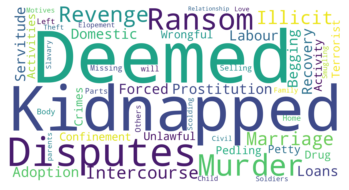

In [9]:
#Factors

text = " ".join(fact for fact in data.Factors)
word_cloud1 = WordCloud(collocations = False, background_color = 'white', width = 2048, height = 1080).generate(text)
word_cloud1.to_file('kid.png')
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#Dataframes for States and Union Territories

data1=data[['Year','State/UT','Region_Type','KD_Total_Cases']].copy()
states=data1[data1['Region_Type']=='State']
UTs=data1[data1['Region_Type']=='UT']

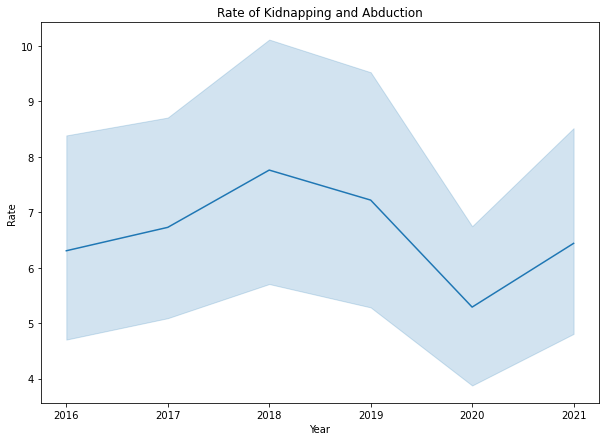

In [11]:
#Rate of Kidnapping and Abduction

plt.figure(figsize=(10,7))
sns.lineplot(x=data['Year'],y=data['Rate_of_kanda']);
plt.title("Rate of Kidnapping and Abduction");
plt.xlabel("Year");
plt.ylabel("Rate");

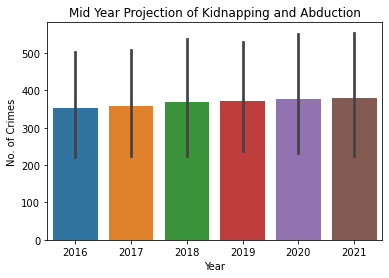

In [12]:
#Mid Year Projection of Kidnapping and Abduction

sns.barplot(y='Mid_Year_Projection',x='Year',data=data);
plt.title("Mid Year Projection of Kidnapping and Abduction");
plt.xlabel("Year");
plt.ylabel("No. of Crimes");

Text(0, 0.5, 'Total Crimes')

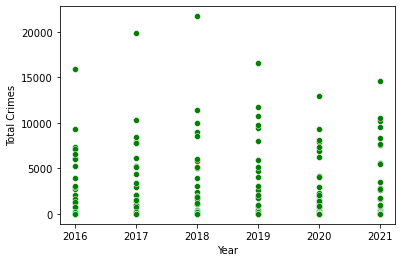

In [13]:
#Kidnapping and Abduction over the years

sns.scatterplot(x = data['Year'], y = data['KD_Total_Cases'], color="green")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

In [14]:
#Kidnapping and Abduction cases in States over the years

fig=px.bar(states,x='State/UT',y='KD_Total_Cases',color='Year',title='Kidnapping and Abduction cases in States over the years')
fig.show()

In [15]:
#States with Highest Kidnapping and Abduction Rate

fig = px.pie(states, values='KD_Total_Cases', names='State/UT',
             title='States with Highest Kidnapping and Abduction Rate',
             hover_data=['KD_Total_Cases'],labels={'State':'States with Highest Kidnapping and Abduction Rate'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [16]:
#Kidnapping and Abduction cases in Union Territories over the years

fig=px.bar(UTs,x='State/UT',y='KD_Total_Cases',color='Year',title='Kidnapping and Abduction cases in Union Territories over the years')
fig.show()

In [17]:
#Union Territories with Highest Kidnapping and Abduction Rate

fig = px.pie(UTs, values='KD_Total_Cases', names='State/UT',
             title='Union Territories with Highest Kidnapping and Abduction Rate',
             hover_data=['KD_Total_Cases'],labels={'State':'Union Territories with Highest Kidnapping and Abduction Rate'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

[Text(0, 0, '')]

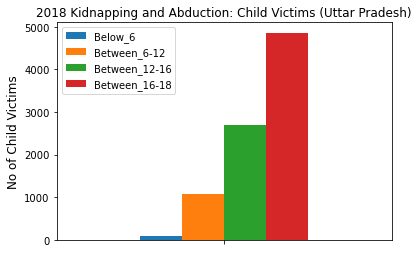

In [18]:
#2018 Kidnapping and Abduction: Child Victims (Uttar Pradesh)

child=data.loc[data['State/UT']=='Uttar Pradesh']
childup=child[(child['Year']==2018)]
ax = childup[['Below_6','Between_6-12','Between_12-16','Between_16-18']].plot(kind='bar',legend=True, title = '2018 Kidnapping and Abduction: Child Victims (Uttar Pradesh)')
ax.set_ylabel("No of Child Victims", fontsize=12)
ax.set_xticklabels([])

[Text(0, 0, '')]

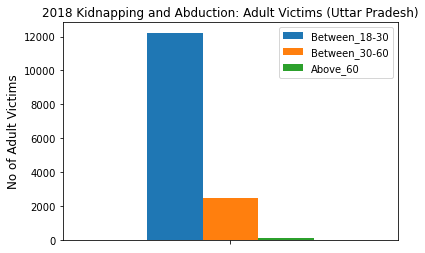

In [19]:
#2018 Kidnapping and Abduction: Adult Victims (Uttar Pradesh)

adult=data.loc[data['State/UT']=='Uttar Pradesh']
adultup=adult[(adult['Year']==2018)]
ax = adultup[['Between_18-30','Between_30-60','Above_60']].plot(kind='bar',legend=True, title = '2018 Kidnapping and Abduction: Adult Victims (Uttar Pradesh)')
ax.set_ylabel("No of Adult Victims", fontsize=12)
ax.set_xticklabels([])

[Text(0, 0, '')]

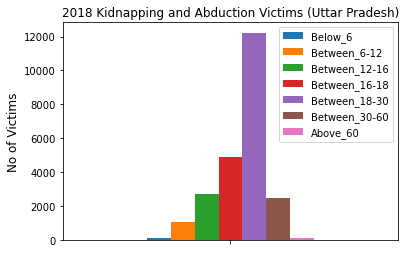

In [20]:
#2018 Kidnapping and Abduction Victims (Uttar Pradesh)

vict=data.loc[data['State/UT']=='Uttar Pradesh']
victup=vict[(vict['Year']==2018)]
ax = victup[['Below_6','Between_6-12','Between_12-16','Between_16-18','Between_18-30','Between_30-60','Above_60']].plot(kind='bar',legend=True, title = '2018 Kidnapping and Abduction Victims (Uttar Pradesh)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([])

In [21]:
#2018: Child Victims vs Adult Victims (Uttar Pradesh)

labels = ['Child Victims','Adult Victims']
values = [29565,45379]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

[Text(0, 0, '')]

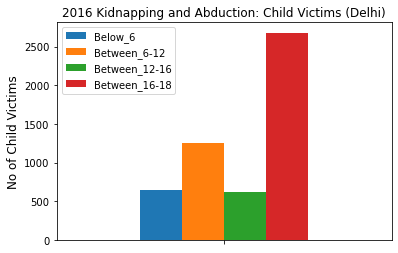

In [22]:
#2016 Kidnapping and Abduction: Child Victims (Delhi)

child=data.loc[data['State/UT']=='Delhi']
childdl=child[(child['Year']==2016)]
ax = childdl[['Below_6','Between_6-12','Between_12-16','Between_16-18']].plot(kind='bar',legend=True, title = '2016 Kidnapping and Abduction: Child Victims (Delhi)')
ax.set_ylabel("No of Child Victims", fontsize=12)
ax.set_xticklabels([])

[Text(0, 0, '')]

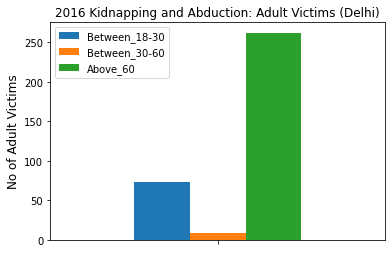

In [23]:
#2016 Kidnapping and Abduction: Adult Victims (Delhi)

adult=data.loc[data['State/UT']=='Delhi']
adultdl=adult[(adult['Year']==2016)]
ax = adultdl[['Between_18-30','Between_30-60','Above_60']].plot(kind='bar',legend=True, title = '2016 Kidnapping and Abduction: Adult Victims (Delhi)')
ax.set_ylabel("No of Adult Victims", fontsize=12)
ax.set_xticklabels([])

[Text(0, 0, '')]

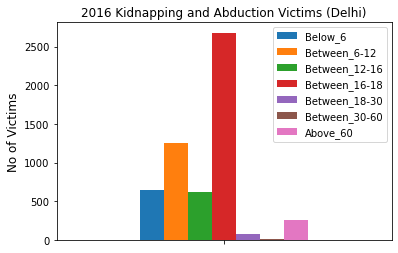

In [24]:
#2016 Kidnapping and Abduction Victims (Delhi)

vict=data.loc[data['State/UT']=='Delhi']
victdl=vict[(vict['Year']==2016)]
ax = victdl[['Below_6','Between_6-12','Between_12-16','Between_16-18','Between_18-30','Between_30-60','Above_60']].plot(kind='bar',legend=True, title = '2016 Kidnapping and Abduction Victims (Delhi)')
ax.set_ylabel("No of Victims", fontsize=12)
ax.set_xticklabels([])

In [25]:
#2016: Child Victims vs Adult Victims (Delhi)

labels = ['Child Victims','Adult Victims']
values = [16324,5392]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

In [26]:
#Data Frame

df=data.iloc[:217,1:42]

Text(0, 0.5, 'Number of crimes')

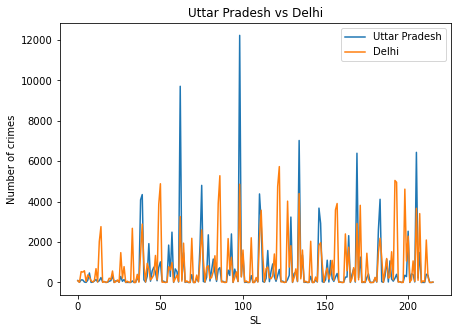

In [27]:
#Uttar Pradesh vs Delhi

plt.figure(figsize=(7,5))
plt.title('Uttar Pradesh vs Delhi')
sns.lineplot(data=df['Between_18-30'], label='Uttar Pradesh')
sns.lineplot(data=df['Between_16-18'], label='Delhi')
plt.xlabel('SL')
plt.ylabel('Number of crimes')

In [28]:
#Gender wise Kidnapping and Abduction of Child Victims

age = ['Below_6','Between_6-12','Between_12-16','Between_16-18']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=age,
    y=[3514,13503,43529,44407],
    name='Male',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=age,
    y=[4599,19873,112918,168674],
    name='Female',
    marker_color='indianred'
))

fig.update_layout(title_text='Gender wise Kidnapping and Abduction of Child Victims',barmode='group', xaxis_tickangle=-45)
fig.show()

In [29]:
#Gender wise Kidnapping and Abduction of Adult Victims

age = ['Between_18-30','Between_30-60','Above_60']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=age,
    y=[44952,19959,718],
    name='Male',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=age,
    y=[141734,43681,1193],
    name='Female',
    marker_color='indianred'
))

fig.update_layout(title_text='Gender wise Kidnapping and Abduction of Adult Victims',barmode='group', xaxis_tickangle=-45)
fig.show()

In [30]:
#Gender wise Kidnapping and Abduction of Victims

age = ['Below_6','Between_6-12','Between_12-16','Between_16-18','Between_18-30','Between_30-60','Above_60']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=age,
    y=[3514,13503,43529,44407,44952,19959,718],
    name='Male',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=age,
    y=[4599,19873,112918,168674,141734,43681,1193],
    name='Female',
    marker_color='indianred'
))

fig.update_layout(title_text='Gender wise Kidnapping and Abduction of Victims',barmode='group', xaxis_tickangle=-45)
fig.show()

In [31]:
#Male Victims vs Female Victims

labels = ['Male Victims','Female Victims']
values = [170582,492672]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

<AxesSubplot:title={'center':'Female victims'}, xlabel='Year'>

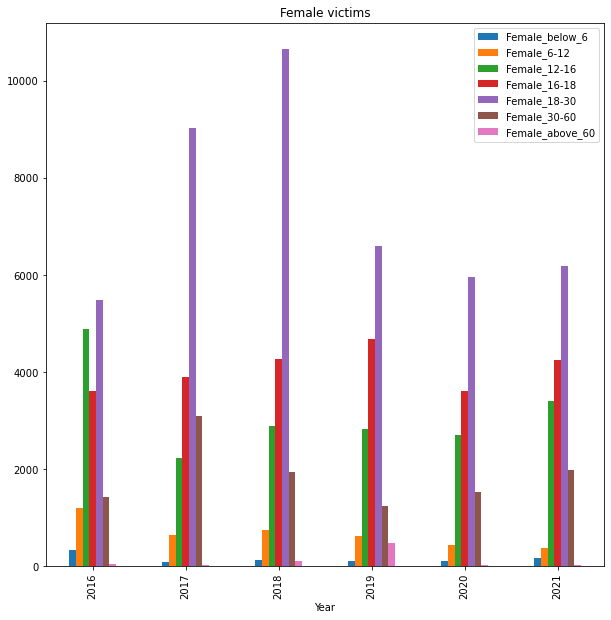

In [32]:
#Kidnapping and Abduction: Female Victims

data.groupby("Year")[['Female_below_6','Female_6-12','Female_12-16','Female_16-18','Female_18-30','Female_30-60','Female_above_60']].max().plot(title='Female victims',kind='bar',figsize=(10,10))

Text(451.8604166666667, 0.5, 'Recovery Analysis')

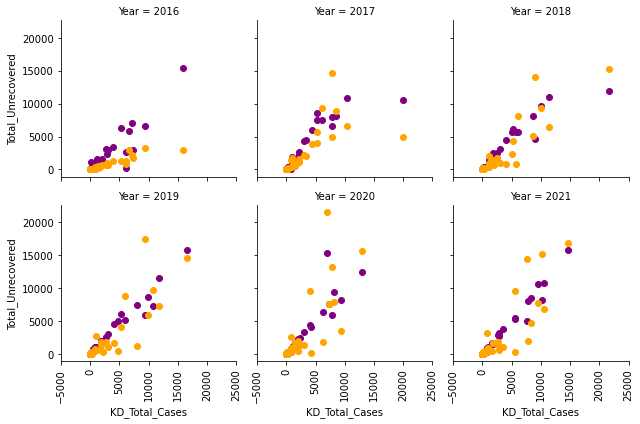

In [33]:
#Recovery Analysis

g=sns.FacetGrid(col='Year',data=df,col_wrap=3)
g.map(plt.scatter,"KD_Total_Cases","Total_Recovered",color="purple")
g.map(plt.scatter,"KD_Total_Cases","Total_Unrecovered",color="orange")
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.ylabel("Recovery Analysis")

<AxesSubplot:title={'center':'Recovered Victims'}, ylabel='State/UT'>

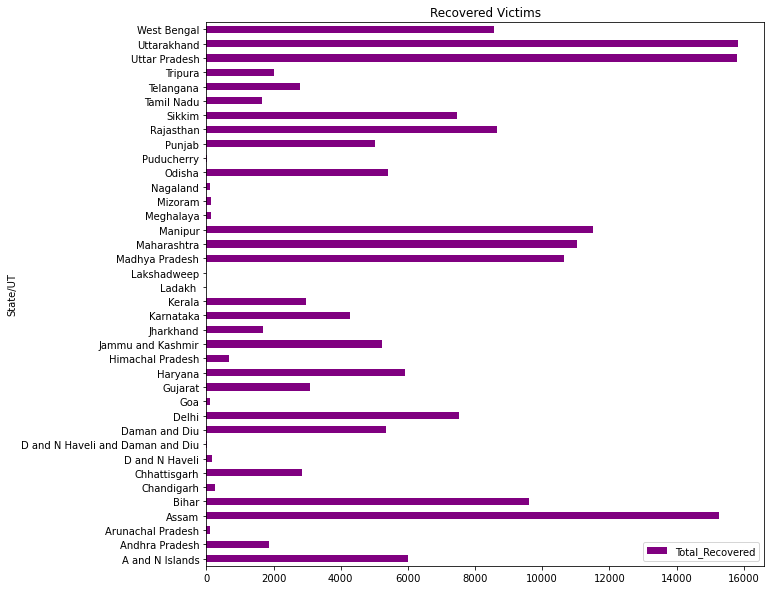

In [34]:
#Recovered Victims

data.groupby("State/UT")[['Total_Recovered']].max().plot(title='Recovered Victims',kind='barh',figsize=(10,10),color='purple')

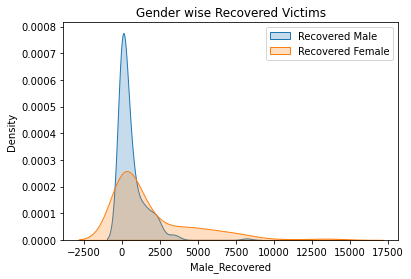

In [35]:
#Gender wise Recovered Victims

sns.kdeplot(data=df['Male_Recovered'],label='Recovered Male', shade=True)
sns.kdeplot(data=df['Female_Recovered'],label='Recovered Female', shade=True)
plt.title('Gender wise Recovered Victims')
plt.legend()

<AxesSubplot:title={'center':'Unrecovered Victims'}, ylabel='State/UT'>

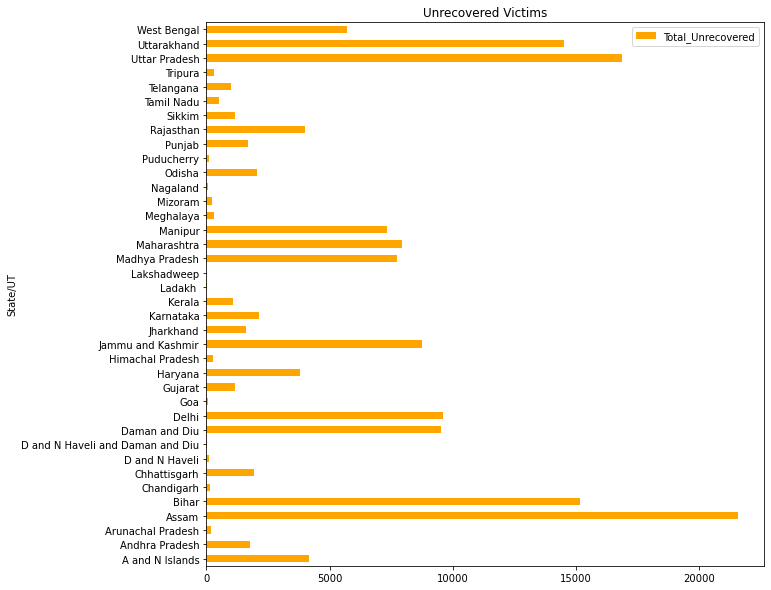

In [36]:
#Unrecovered Victims

data.groupby("State/UT")[['Total_Unrecovered']].max().plot(title='Unrecovered Victims',kind='barh',figsize=(10,10),color='orange')

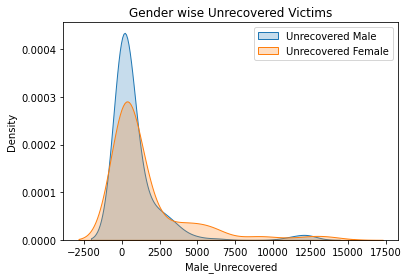

In [37]:
#Gender wise Unrecovered Victims

sns.kdeplot(data=df['Male_Unrecovered'],label='Unrecovered Male', shade=True)
sns.kdeplot(data=df['Female_Unrecovered'],label='Unrecovered Female', shade=True)
plt.title('Gender wise Unrecovered Victims')
plt.legend()

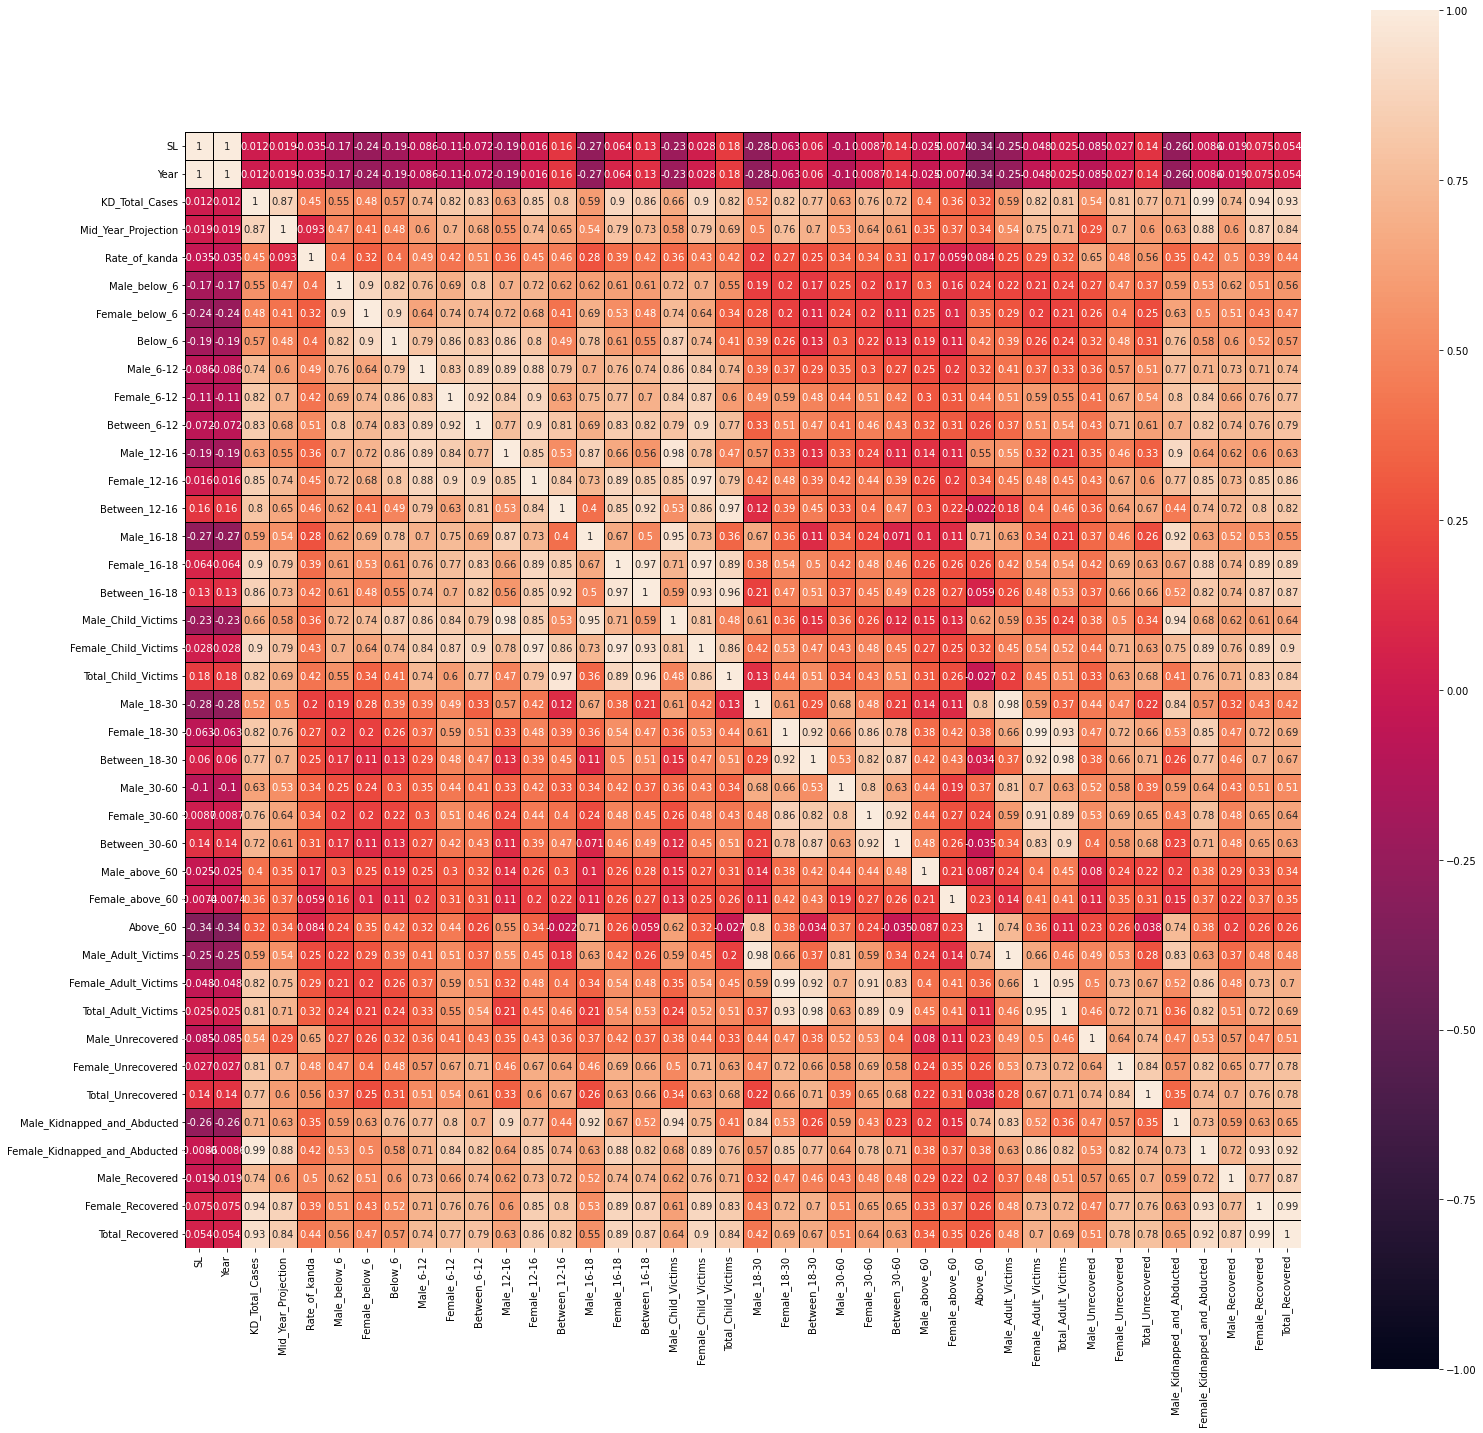

In [38]:
#Correlation Matrix

fig=plt.gcf()
fig.set_size_inches(25,25)
fig=sns.heatmap(data.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [25]:
#Set X and y

X=data.drop(["State/UT","Region_Type","KD_Total_Cases","Factors"],axis=1)
y=data["KD_Total_Cases"]

In [26]:
#Split the data set into training and testing data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [27]:
#Prediction: Linear Regression

model=LinearRegression()
model.fit(X_train,y_train)
Linreg = model.predict(X_test)

In [28]:
print("R2 score  :",r2_score(y_test,Linreg))
print("MSE score  :",mean_squared_error(y_test,Linreg))
print("RMSE: ",sqrt(mean_squared_error(y_test,Linreg)))

R2 score  : 0.9900073987489251
MSE score  : 176235.07288707385
RMSE:  419.8036122844512


In [29]:
#Prediction: Decision Tree

DTmodel=DecisionTreeRegressor(max_depth=15)
DTmodel.fit(X_train,y_train)
y_pred = DTmodel.predict(X_test)

In [30]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.9664863541968706
MSE score  : 591065.2954545454
RMSE:  768.8077103245944


In [31]:
#Prediction: KNN

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

In [32]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.930170551120772
MSE score  : 1231550.9949494952
RMSE:  1109.7526728733278


In [33]:
#Prediction: Randon Forest

RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)
RFRmodel.fit(X_train,y_train)
y_pred1 = RFRmodel.predict(X_test)

In [34]:
print("R2 score  :",r2_score(y_test, y_pred1))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.956609372420535
MSE score  : 765261.2389852201
RMSE:  874.7921118672825


<AxesSubplot:>

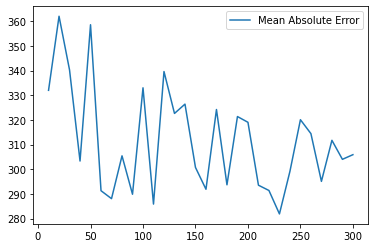

In [35]:
mae=[]
j=[]
for i in range(10,310,10):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(X_train,y_train)
    pred = rf.predict(X_test)
    mae.append(mean_absolute_error(pred,y_test))
    j.append(i)
score = pd.DataFrame({'Mean Absolute Error':mae},index=j)
score.plot.line()

In [36]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print('MAE: ',mean_absolute_error(pred,y_test))

MAE:  269.81848484848484


In [37]:
table= pd.DataFrame({'Importance':np.round(rf.feature_importances_,decimals=3)},index=X_train.columns).sort_values(by='Importance',ascending=False).head(10)
table

Importance
Female_Kidnapped_and_Abducted       0.749
Total_Recovered                     0.104
Female_18-30                        0.023
Female_Recovered                    0.016
Total_Adult_Victims                 0.015
Between_18-30                       0.015
Female_Adult_Victims                0.015
Mid_Year_Projection                 0.011
Female_16-18                        0.010
Female_Child_Victims                0.005

In [38]:
train=data.iloc[:217,1:42]
X=train[['Female_Kidnapped_and_Abducted','Total_Recovered','Female_Adult_Victims','Total_Adult_Victims','Mid_Year_Projection']]
y=train['KD_Total_Cases']
X=pd.get_dummies(X)
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3,random_state=1)
rf=RandomForestRegressor(n_estimators=150)
rf.fit(X_train,y_train)
pred = rf.predict(X_valid)
print('MAE: ',mean_absolute_error(pred,y_valid))

MAE:  356.50225641025645


In [39]:
test=data.iloc[:217,1:42]
test_1 = test.copy()
test_1 = test_1[['Female_Kidnapped_and_Abducted','Total_Recovered','Female_Adult_Victims','Total_Adult_Victims','Mid_Year_Projection']]
test_1 = pd.get_dummies(test_1)

In [40]:
test_1.head()

Female_Kidnapped_and_Abducted  Total_Recovered  Female_Adult_Victims  \
0                            925              331                   448   
1                            123               95                    65   
2                           6128              249                  4677   
3                           7329             2946                  4072   
4                           2151             1601                    97   

   Total_Adult_Victims  Mid_Year_Projection  
0                  342                517.4  
1                    5                 13.2  
2                 2444                325.8  
3                 1909               1043.0  
4                  353                259.9